In [37]:
import pandas as pd

df = pd.read_csv('obweb/osaka_q1.csv', parse_dates=[['date','hour']], na_values='*', index_col='date_hour')

df.head()

,id,layer,depth,deepest,temperature,salilnity,light_quantum,DO,turbidity,chlorophyll
date_hour,,,,,,,,,,
2012-01-01,2012-01-01-00-0.5,0.5,0.5,NaN,9.50,19.83,0.2,99.3,0.75,3.0
2012-01-01,2012-01-01-00-1,1.0,1.0,NaN,12.38,27.29,0.2,101.2,0.43,2.8
2012-01-01,2012-01-01-00-2,2.0,2.0,NaN,13.02,30.66,0.2,96.9,0.38,1.5
2012-01-01,2012-01-01-00-3,3.0,3.0,NaN,13.00,30.67,0.2,96.0,0.36,1.2
2012-01-01,2012-01-01-00-4,4.0,4.0,NaN,12.97,30.76,0.3,95.1,0.32,1.2


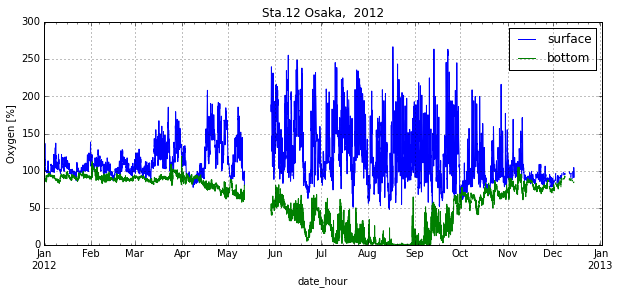

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt

varname = "DO"

s = df[df.depth==0.5]
b = df[df.deepest=='B']

plt.figure(figsize=[10,4])

s[varname].plot(label='surface')
b[varname].plot(label='bottom')

plt.title('Sta.12 Osaka,  2012')
plt.ylabel('Oxygen [%]')
plt.legend(loc='best')

plt.savefig('t-plot_12_osaka_2012_DO.png', bbox_inches='tight')

<Container object of 3 artists>

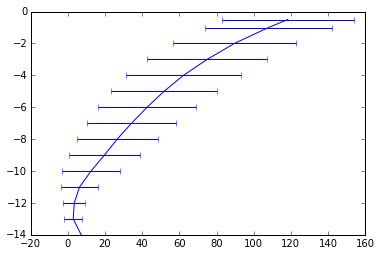

In [77]:
import datetime

start = datetime.datetime(2012,8,1,0,0)
end = datetime.datetime(2012,9,1,0,0)

varname = "DO"

mon = df.reset_index()
mon = mon[mon.date_hour < end]
mon = mon[mon.date_hour >= start]

mon = mon.groupby('layer')

mean = mon.mean()
std = mon.std()

#plt.plot(mean[varname], -mean.index)
plt.errorbar(mean[varname], -mean.index, xerr=std[varname])

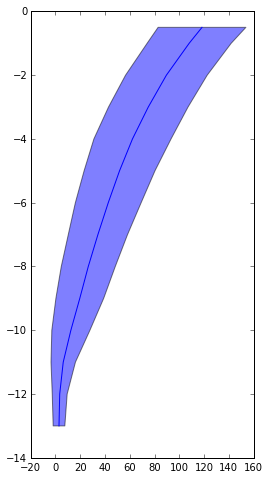

In [84]:
import datetime

start = datetime.datetime(2012,8,1,0,0)
end = datetime.datetime(2012,9,1,0,0)

varname = "DO"

mon = df.reset_index()
mon = mon[mon.date_hour < end]
mon = mon[mon.date_hour >= start]
mon = mon[mon.layer < 14]

mon = mon.groupby('layer')

mean = mon[varname].mean()
std = mon[varname].std()

plt.figure(figsize=[4,8])

plt.plot(mean, -mean.index)
plt.fill_betweenx(-mean.index, mean+std, mean-std, alpha=0.5)

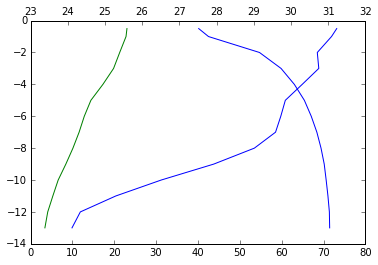

In [94]:
import datetime

start = datetime.datetime(2012,8,1,0,0)
end = datetime.datetime(2012,8,2,0,0)

varname = "DO"

mon = df.reset_index()
mon = mon[mon.date_hour < end]
mon = mon[mon.date_hour >= start]
mon = mon[mon.layer < 14]

mon = mon.groupby('layer')

mean = mon.mean()
std = mon.std()

ax1 = plt.subplot(111)
ax2 = plt.twiny()

ax1.plot(mean.DO, -mean.index)
ax2.plot(mean.salilnity, -mean.index)
ax2.plot(mean.temperature, -mean.index)
